# CREDIT CARD FRAUD DETECTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv('creditcard.csv')
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape


(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

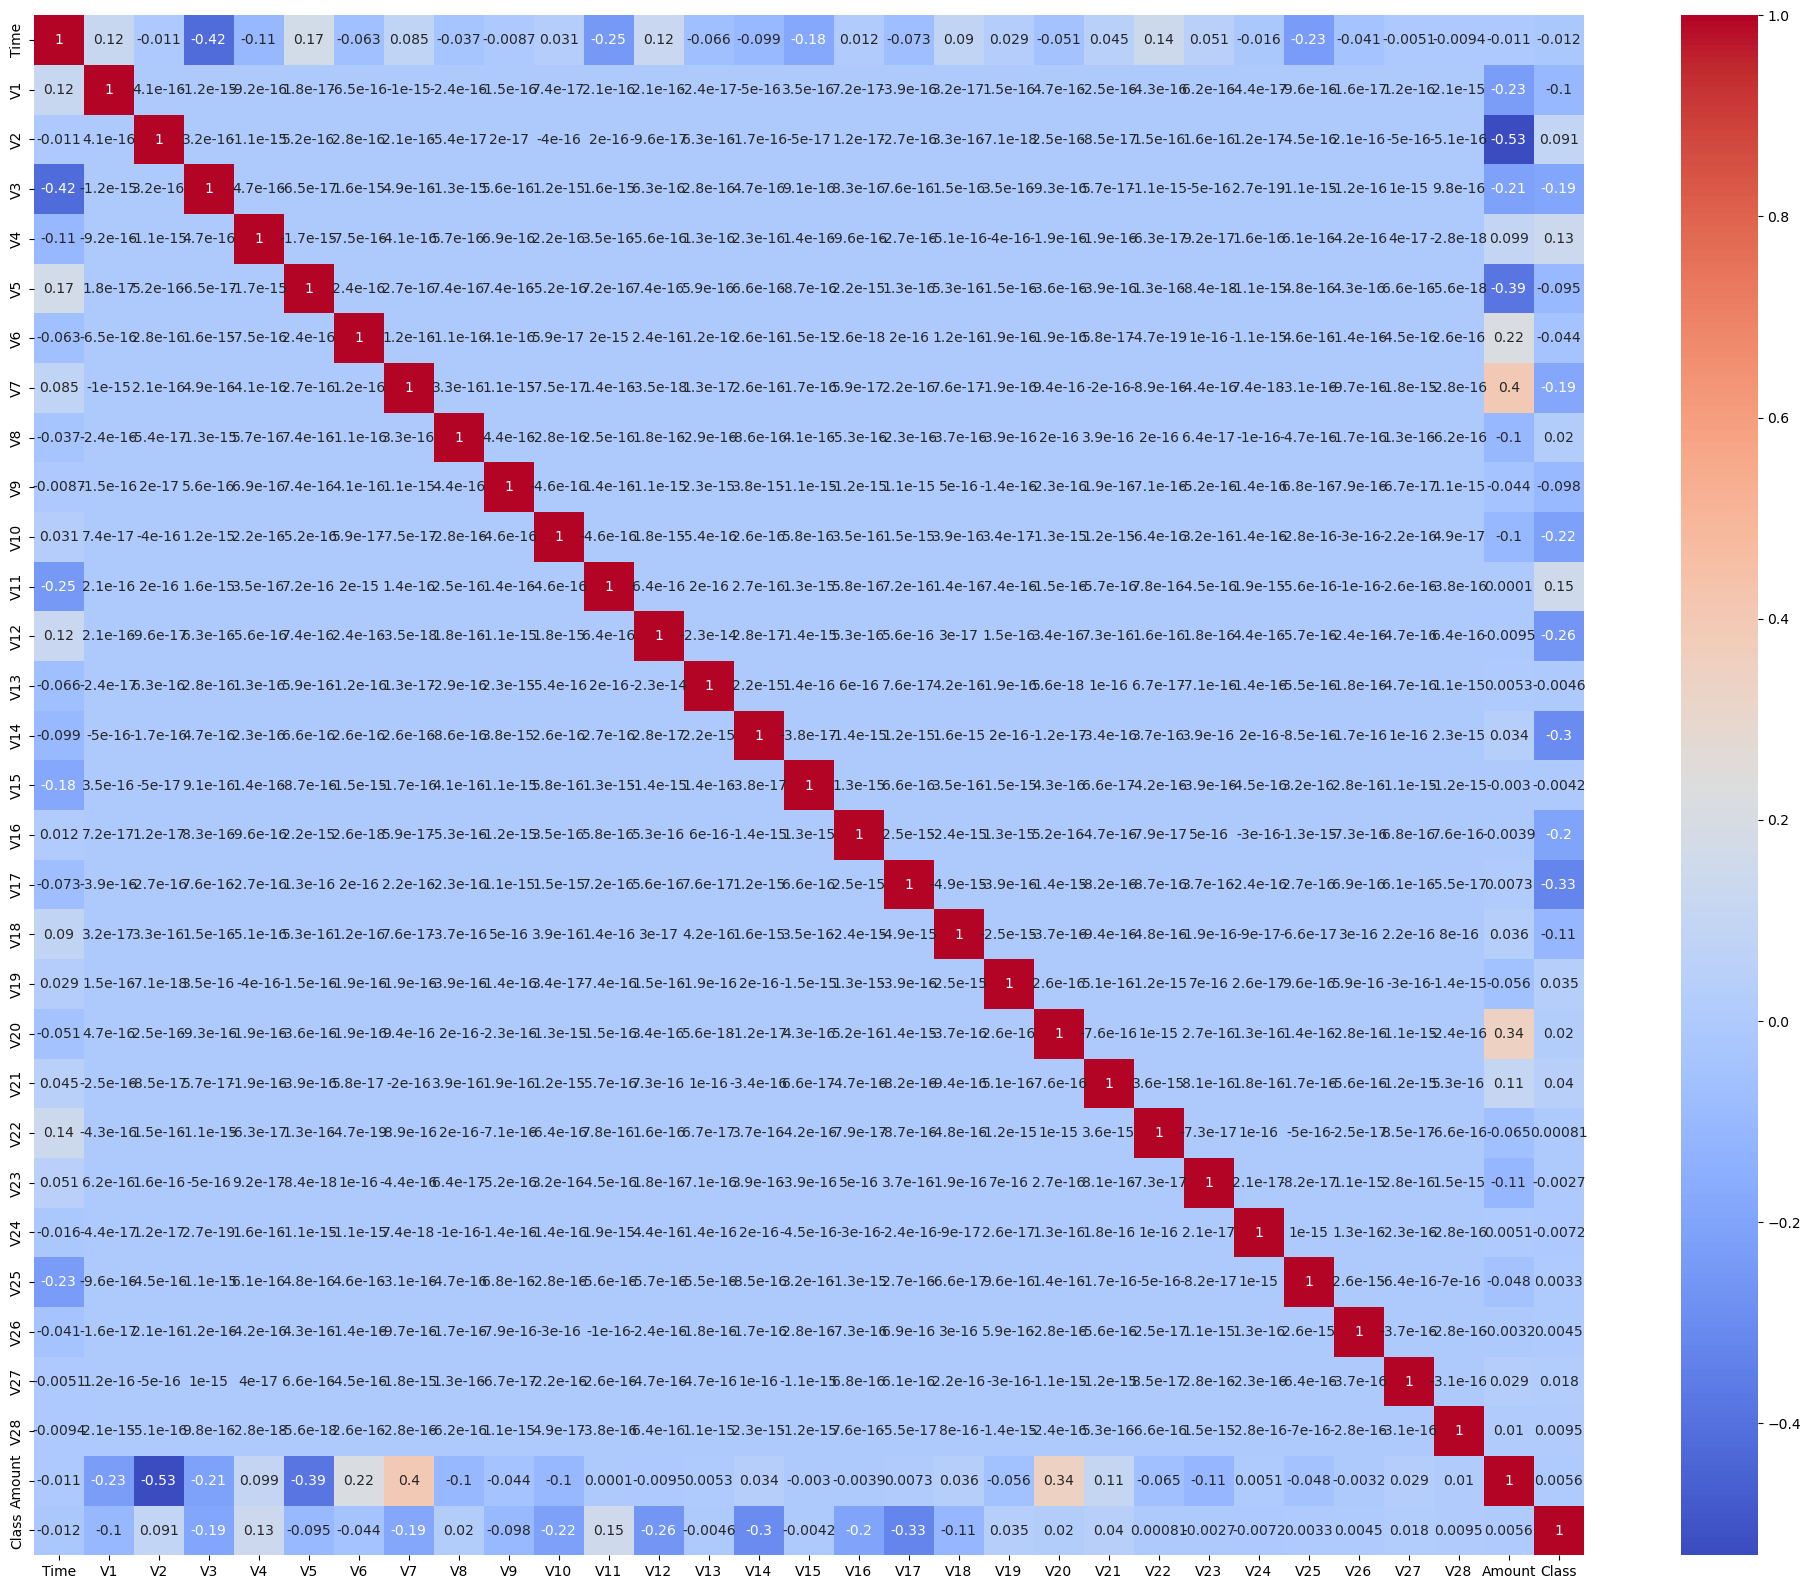

In [9]:
# Checking the correlation
corr = df.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(25,20))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [10]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

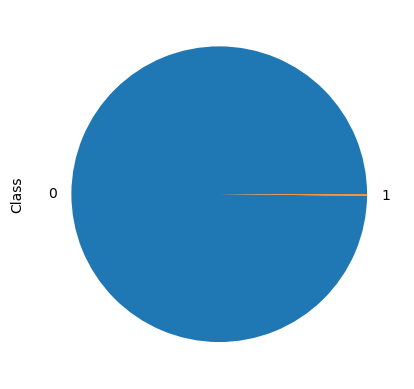

In [11]:
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

In [12]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


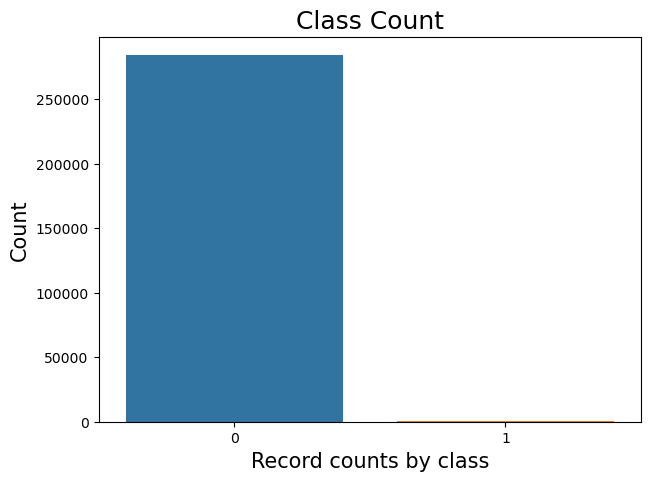

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [14]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [15]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [16]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [17]:
# Checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

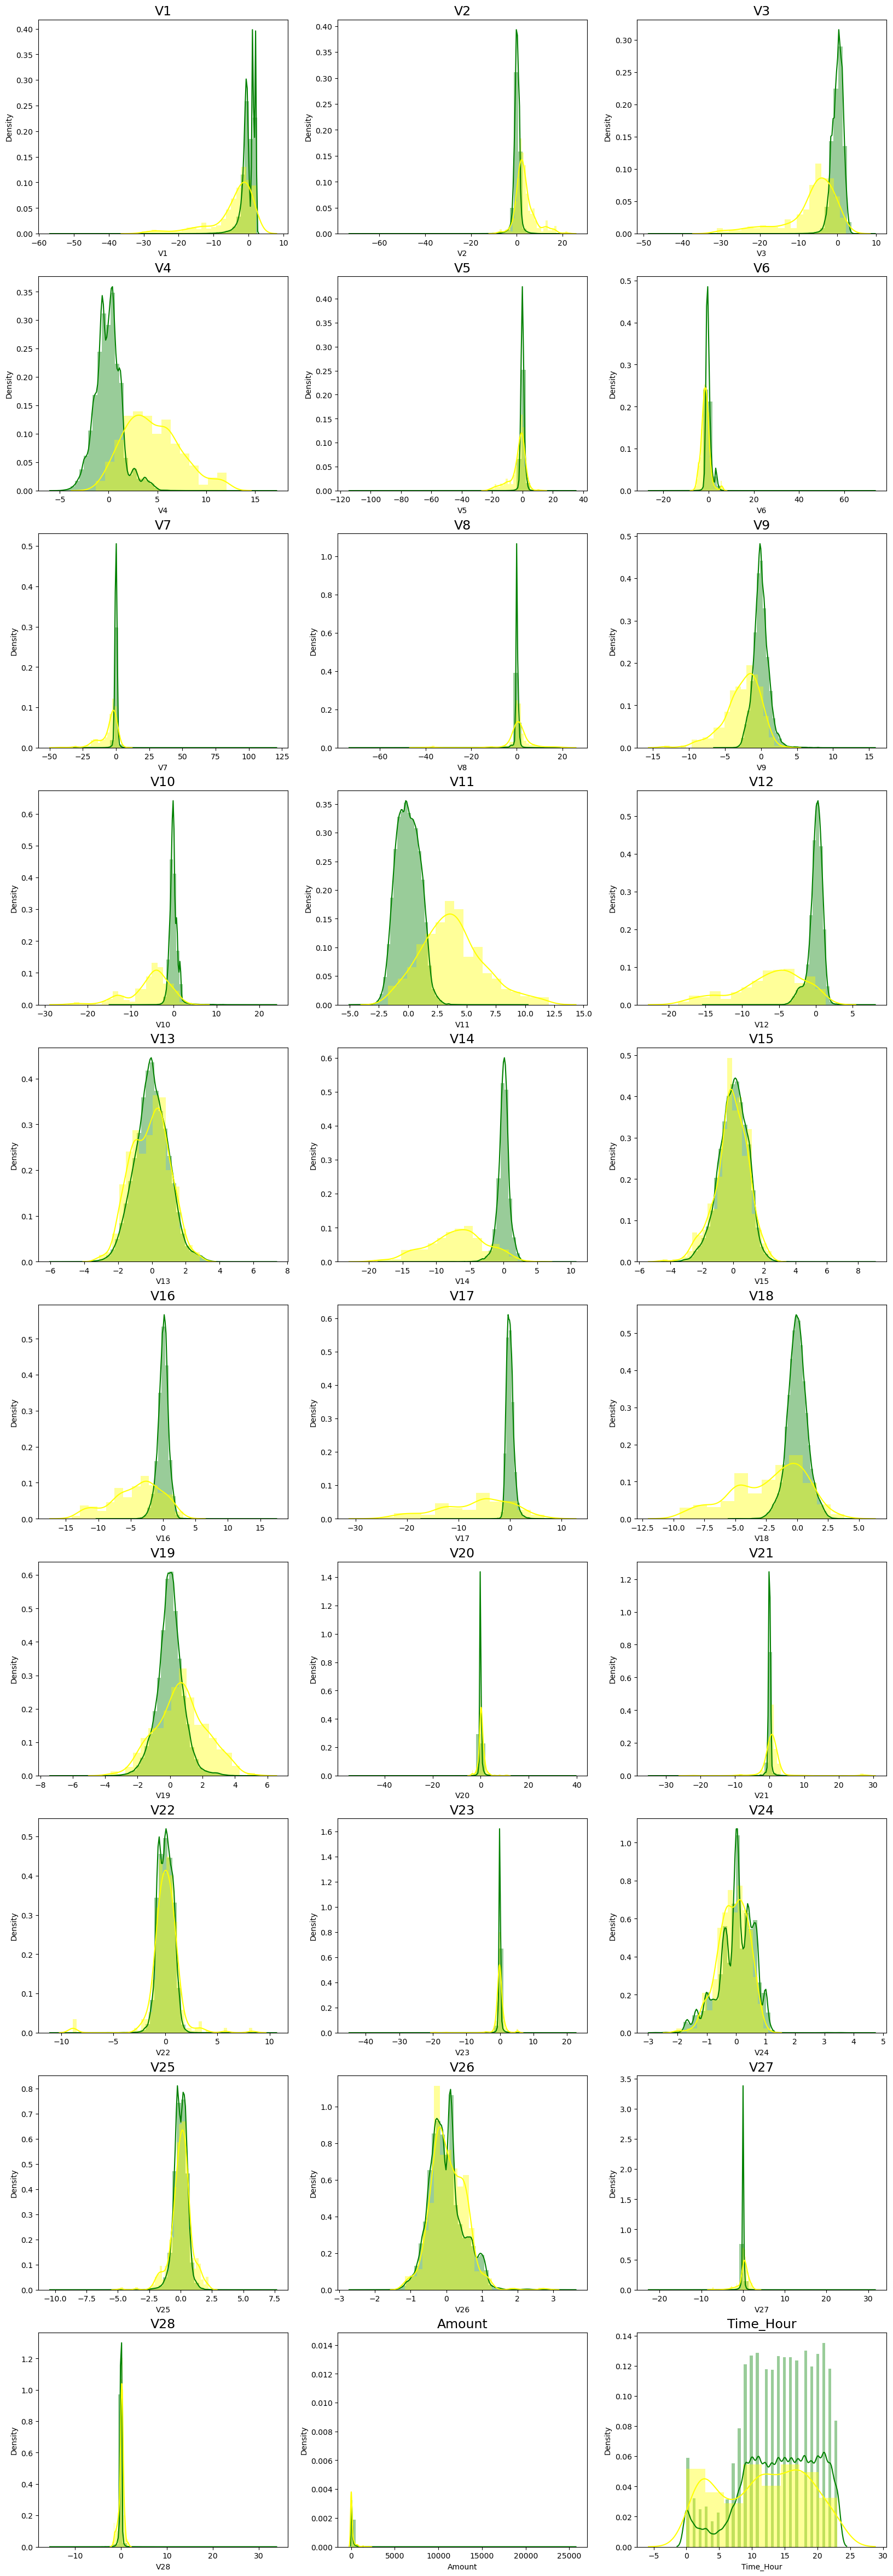

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='yellow')
  plt.title(col, fontsize=17)
plt.show()

In [21]:
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [22]:
x_scaler[-1]

array([-0.27233093, -0.11489898,  0.46386564, -0.35757   , -0.00908946,
       -0.48760183,  1.27476937, -0.3471764 ,  0.44253246, -0.84072963,
       -1.01934641, -0.0315383 , -0.18898634, -0.08795849,  0.04515766,
       -0.34535763, -0.77752147,  0.1997554 , -0.31462479,  0.49673933,
        0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561, -0.90863123,
       -1.69685342, -0.00598394,  0.04134999,  0.51435531,  1.53423047])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Logistic Regression From Scratch

In [24]:
class LogReg:
    def __init__(self,iterations=1000,learning_rate=0.001):
        self.iterations=iterations
        self.lr=learning_rate
        self.feature_names=[]
        self.target_names=[]
        self.num_samples=0
        self.num_features=0
        self.x=0
        self.y=0
        self.tn=0
        self.t0=0
        
    def fit(self,x,y):
        if isinstance(x,pd.DataFrame): 
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        self.num_samples=len(x)
        self.num_features=x.shape[1]
        
        self.tn=np.zeros(self.num_features)
        
        for i in range(self.iterations):
            LR=np.dot(self.x, self.tn) + self.t0
            ht=self._sigmoid_function(LR)
            gtn,gt0=self._updations(ht,self.tn,self.t0)
            self.tn-=self.lr*gtn
            self.t0-=self.lr*gt0
        
    def _updations(self,ht,tn,t0):
        gtn=np.dot(self.x.T, (ht-self.y))
        gtn=(1/self.num_samples)*gtn
        gt0=np.sum(ht-self.y)
        gt0=(1/self.num_samples)*gt0
        return gtn,gt0
        
    def _sigmoid_function(self,x):
        output=1/(1+(np.exp(-x)))
        return output
    
    def _prediction(self,x):
        l=np.dot(x, self.tn) + self.t0
        h=self._sigmoid_function(l)
        if h>0.5:
            return 1
        elif h<0.5:
            return 0
    def predict(self,x):
        predicted_values=[]
        x=np.array(x)
        for i in x:
            predicted_values.append(self._prediction(i))
        return predicted_values

In [25]:
lr_model=LogReg(iterations=1000)
lr_model.fit(X_train,y_train)
yp=lr_model.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,yp)))
print("\nClassification_report : \n")
print(classification_report(y_test,yp))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,yp))

Accuracy_score : 0.9984199992977775

Classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.07      0.13        96

    accuracy                           1.00     56962
   macro avg       0.94      0.54      0.57     56962
weighted avg       1.00      1.00      1.00     56962

Confusion_Matrix : 

[[56865     1]
 [   89     7]]


# KNN From Scratch

In [27]:
import numpy as np
import pandas as pd
import statistics as stats


def distance (x,p): 
        l=list(map(lambda x,y:(x-y)**2,x,p))
        return np.sqrt(sum(l))

class KNearestNeighbours : 
    def __init__(self,n_neighbors=5): 
        self.n_neighbors=n_neighbors 
        self.feature_names=[]
        self.target_names=[]
        self.num_sampels=0
        self.x=0
        self.y=0
        self.predicted_values=0

    def fit(self,x,y): 
        if isinstance(x,pd.DataFrame): 
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        
        if np.isnan(self.x).any() or np.isnan(self.y).any(): 
            raise Exception("model does not accept NAN values")
            
        self.num_sampels=len(x)
        
    def predict(self, p): 
        predict_values=[] 
        p=np.array(p) 
        for i in p: 
            p = dict(sorted(self._predictions(i).items())[0:self.n_neighbors]) 
            predict_values.append(stats.mode(p.values())) 
        self.predicted_values=predict_values
        return predict_values

    def _predictions(self,p):
        d=dict()
        for x,y in zip(self.x,self.y):
            dis=distance(x,p)
            d.update({dis:y})
        return d
    

In [27]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state =100)
knn = KNearestNeighbours(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Accuracy_score : 0.98856416772554

Classification_report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2987
           1       1.00      0.78      0.87       161

    accuracy                           0.99      3148
   macro avg       0.99      0.89      0.93      3148
weighted avg       0.99      0.99      0.99      3148

Confusion_Matrix : 

[[2987    0]
 [  36  125]]


# SVM From Scratch

In [29]:
class SVM:
    def __init__(self):
        self.x=None
        self.y=None
        self.feature_names=None
        self.target_name=None
        self.w=None
        self.r=None
        self.psi=None
        
    def fit(self,X,y):
        if isinstance(X,pd.DataFrame): 
            self.feature_names = [f for f in X.columns]
            self.x=np.array(X)
        else:
            self.x=X
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1,1)
        else:
            self.y=y
        self.w,self.r,self.psi=self._optimization(self.x,self.y,0.1)
            
    def _optimization(self,x,y,c):
        xrows=len(x)
        xcols=x.shape[1]
        D=np.diag(y)
        E=np.ones(xrows)
        W=cp.Variable(xcols)
        r=cp.Variable(1)
        psi=cp.Variable(xrows)
        obj=cp.Minimize(0.5*cp.norm(W)**2 + c*cp.sum(psi))
        constraints=[cp.matmul(D, x*W-r*E)+psi >=E , psi >= 0]
        opt=cp.Problem(obj, constraints)
        opt.solve()
        W=np.array(W.value)
        r=r.value
        psi=np.array(psi.value)
        return W,r,psi
    
    def _prediction(self,x):
        x=x.reshape(x.shape[0],1)
        p=(np.matmul(self.w,x) - self.r)
        if p>0:
            return 1
        elif p<0:
            return -1
        
    def predict(self,x):
        ypred=[]
        x=np.array(x)
        for i in range(0,x.shape[0]):
            ypred.append(self._prediction(x[i,:]))
        return ypred
    

In [106]:
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Splitting the dataset into X and y
df['Class'].replace(0,-1,inplace=True)
y= df['Class']
X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

svm_model=SVM()
svm_model.fit(X_train,y_train)
yp=svm_model.predict(X_test)


print("Accuracy_score : {}".format(accuracy_score(y_test,yp)))
print("\nClassification_report : \n")
print(classification_report(y_test,yp))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,yp))

Accuracy_score : 0.9995235826584088

Classification_report : 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1985
           1       0.99      1.00      1.00       114

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099

Confusion_Matrix : 

[[1984    1]
 [   0  114]]


# Logistic Regression Using Inbuilt Functions:

In [26]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size=0.20)
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,yp)))
print("\nClassification_report : \n")
print(classification_report(y_test,yp))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,yp))

Accuracy_score : 0.9983497770443454

Classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56876
           1       0.00      0.00      0.00        86

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion_Matrix : 

[[56868     8]
 [   86     0]]


# KNN Using Inbuilt Functions

In [28]:
from sklearn.neighbors import KNeighborsClassifier

[X_train,X_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state = 100)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Accuracy_score : 0.9990285921608558

Classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.53      0.64       142

    accuracy                           1.00     85443
   macro avg       0.91      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_Matrix : 

[[85285    16]
 [   67    75]]


# SVM Using In-Built Functions:


In [31]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[X_train,X_test,Y_train,Y_test] = train_test_split(X,y,test_size=0.3,random_state=100)
svc = SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))


Accuracy_score : 0.9986774808936952

Classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.72      0.33      0.45       142

    accuracy                           1.00     85443
   macro avg       0.86      0.67      0.73     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_Matrix : 

[[85283    18]
 [   95    47]]
